In [1]:
from torchvision import datasets
data_path = '../temp'
c10 = datasets.CIFAR10(data_path, train=True, download=True)
c10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [3]:
label_map = {0: 0, 2: 1}
c2 = [(to_tensor(img), label_map[label])
                 for img, label in c10
                 if label in [0, 2]]
c2_val = [(to_tensor(img), label_map[label])
                 for img, label in c10_val
                 if label in [0, 2]]

In [4]:
import torch

In [5]:
i = torch.stack([img[0].view(-1).unsqueeze(0) for img in c2]).squeeze(1)

In [6]:
v = torch.stack([img[0].view(-1).unsqueeze(0) for img in c2_val]).squeeze(1)

In [6]:
i.shape

torch.Size([10000, 3072])

In [16]:
v.shape

torch.Size([2000, 3072])

In [7]:
import torch
yt = []
for img in c2:
    label = img[1]
    if label == 0:
        yt.append(torch.tensor([[1.0,0.0]]))
    else:
        yt.append(torch.tensor([[0.0,1.0]]))

In [8]:
y = torch.stack(yt).squeeze(1)

In [9]:
y.shape

torch.Size([10000, 2])

In [21]:
import torch.nn as nn
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

In [22]:
import torch
loss = nn.MSELoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(500):
    pred = model(i)
    
    l = loss(pred, y)
    
    trainer.zero_grad()
    l.backward()
    trainer.step()
    
    if epoch%10 == 0:
        print(f'epoch {epoch+1}, loss {l:f}', 'val', ev())

epoch 1, loss 0.246820 val 0.54
epoch 11, loss 0.236870 val 0.5945
epoch 21, loss 0.229895 val 0.67
epoch 31, loss 0.224026 val 0.712
epoch 41, loss 0.218883 val 0.734
epoch 51, loss 0.214339 val 0.7435
epoch 61, loss 0.210291 val 0.7515
epoch 71, loss 0.206662 val 0.7585
epoch 81, loss 0.203402 val 0.76
epoch 91, loss 0.200478 val 0.7605
epoch 101, loss 0.197853 val 0.761
epoch 111, loss 0.195492 val 0.763
epoch 121, loss 0.193360 val 0.7645
epoch 131, loss 0.191432 val 0.766
epoch 141, loss 0.189684 val 0.766
epoch 151, loss 0.188092 val 0.7665
epoch 161, loss 0.186637 val 0.765
epoch 171, loss 0.185302 val 0.765
epoch 181, loss 0.184074 val 0.766
epoch 191, loss 0.182944 val 0.7645
epoch 201, loss 0.181899 val 0.765
epoch 211, loss 0.180945 val 0.7655
epoch 221, loss 0.180072 val 0.766
epoch 231, loss 0.179265 val 0.7675
epoch 241, loss 0.178515 val 0.768
epoch 251, loss 0.177817 val 0.7695
epoch 261, loss 0.177164 val 0.77
epoch 271, loss 0.176554 val 0.77
epoch 281, loss 0.175980 

In [ ]:
c = 0
for img, label in c2_val:
    x = img.view(-1).unsqueeze(0)
    pt = model(x)
    if float(pt[0][0]) < 0.5:
        lp = 0
    else:
        lp = 1
    if lp == label:
        c += 1
    
print(c)

In [17]:
pred = model(v)

In [20]:
_, p = torch.max(pred, dim=1)

In [22]:
p.shape

torch.Size([2000])

In [10]:
r = torch.tensor([img[1] for img in c2_val])

In [26]:
r

tensor([0, 0, 0,  ..., 0, 1, 0])

In [27]:
p

tensor([1, 1, 0,  ..., 1, 0, 1])

In [33]:
(r == p).sum()

tensor(451)

In [33]:
def ev():
    pred = model2(v)
    _, p = torch.max(pred, dim=1)
    return int((r == p).sum())/2000

In [26]:
logits = torch.tensor([[2.0, 1.0, 0.1], [0.5, 2.5, 0.3]])

In [23]:
labels = torch.tensor([0, 1]) 

In [24]:
criterion = nn.CrossEntropyLoss()

In [27]:
loss = criterion(logits, labels)

In [28]:
print(loss)

tensor(0.3185)


In [29]:
import torch.nn as nn
model2 = nn.Sequential(
            nn.Linear(3072, 512),
            nn.ReLU(),
            nn.Linear(512, 2))

In [30]:
labels = torch.tensor([img[1] for img in c2])

In [40]:
import torch
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model2.parameters(), lr=0.01)
for epoch in range(200):
    pred = model2(i)
    
    l = loss(pred, labels)
    
    trainer.zero_grad()
    l.backward()
    trainer.step()
    
    if epoch%10 == 0:
        print(f'epoch {epoch+1}, loss {l:f}', 'val', ev())

epoch 1, loss 0.450205 val 0.806
epoch 11, loss 0.449774 val 0.806
epoch 21, loss 0.449337 val 0.806
epoch 31, loss 0.448885 val 0.806
epoch 41, loss 0.448333 val 0.806
epoch 51, loss 0.447761 val 0.8065
epoch 61, loss 0.447285 val 0.806
epoch 71, loss 0.446744 val 0.806
epoch 81, loss 0.446180 val 0.806
epoch 91, loss 0.445667 val 0.806
epoch 101, loss 0.445100 val 0.805
epoch 111, loss 0.444535 val 0.8055
epoch 121, loss 0.443947 val 0.8055
epoch 131, loss 0.443410 val 0.806
epoch 141, loss 0.442960 val 0.806
epoch 151, loss 0.442541 val 0.806
epoch 161, loss 0.442113 val 0.8065
epoch 171, loss 0.441745 val 0.806
epoch 181, loss 0.441217 val 0.806
epoch 191, loss 0.440608 val 0.806


In [31]:
labels

tensor([1, 1, 1,  ..., 0, 0, 1])

In [1]:
import matplotlib.pyplot as plt

In [7]:
x = [i * 0.1 + 0.0001 for i in range(10000)]

In [8]:
import math
y = [math.log(i) for i in x]

In [6]:
math.log??

Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method


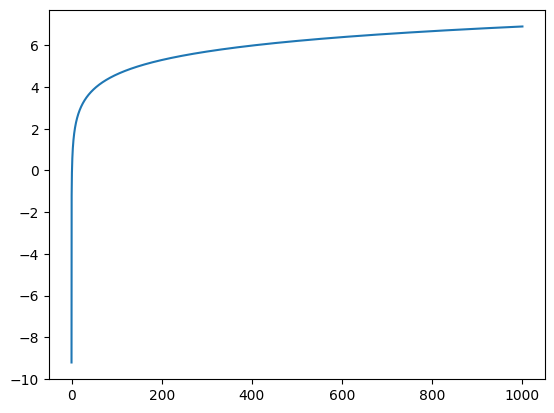

In [9]:
plt.plot(x, y)

In [16]:
x = [i * 0.001 + 0.0001 for i in range(999)]

In [17]:
len(x)

999

In [18]:
y = [-math.log(i) for i in x]

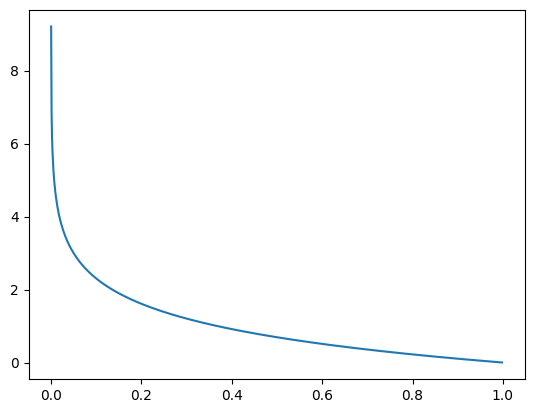

In [19]:
plt.plot(x, y)

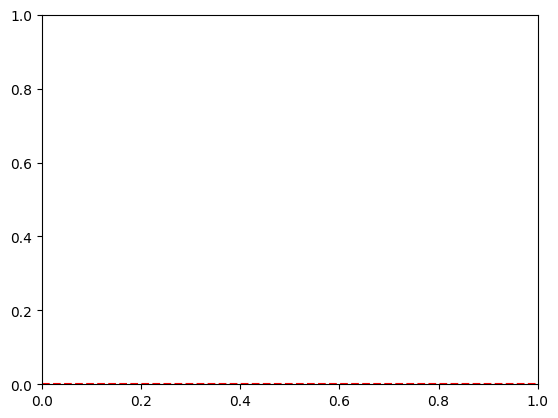

In [20]:
plt.axhline(0, color='red', linestyle='--', label='y=0')

In [21]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

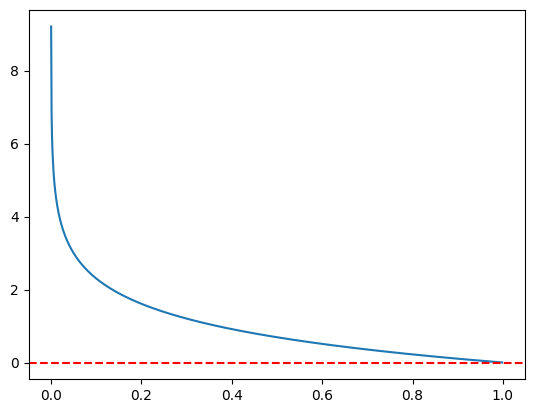

In [22]:
plt.plot(x, y, label='y=-log(x)')
plt.axhline(0, color='red', linestyle='--', label='y=0')

In [23]:
plt.show()

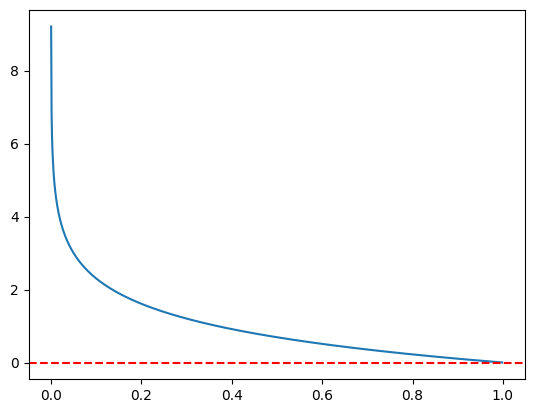

In [24]:
plt.plot(x, y, label='y=-log(x)')
plt.axhline(0, color='red', linestyle='--', label='y=0')

In [25]:
-math.log(0.8)

0.2231435513142097

In [26]:
(0.2**2 * 2) **0.5

0.28284271247461906

In [27]:
-math.log(0.9)

0.10536051565782628

In [28]:
(0.1**2 * 2) **0.5

0.14142135623730953

In [29]:
-math.log(0.6)

0.5108256237659907

In [30]:
(0.4**2 * 2) **0.5

0.5656854249492381

In [33]:
y2 = [((1-i)*2) ** 0.5 for i in x]

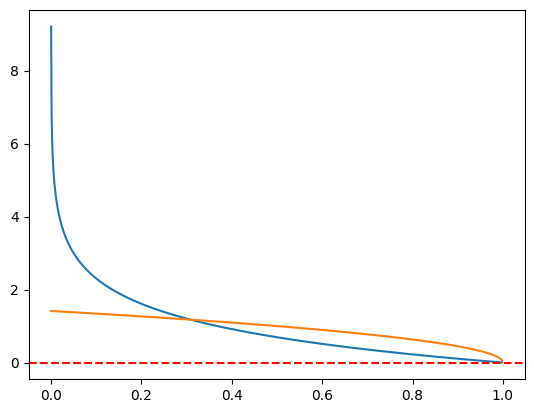

In [35]:
plt.plot(x, y, label='y=-log(x)')
plt.plot(x, y2, label='y=mse')

plt.axhline(0, color='red', linestyle='--', label='y=0')